<a href="https://colab.research.google.com/github/Adarshsharath/DATA_SCIENCE/blob/main/1st_NETFLIX_DATASET.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -



*   Project Type-EDA(Exploratory Data Analysis)
*   Contribution - Individual





# **Project Summary -**

# **GitHub Link -**

Answer Here.

# ***Let's Begin EDA!***

In [ ]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv")

In [ ]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [ ]:
df.shape

(7787, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


This Data Set consists of 7787 rows and 12 columns out of which column release_year has int data type where as others has object datatype

In [ ]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [ ]:
df.describe()


,release_year
count,7787.000000
mean,2013.932580
std,8.757395
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2018.000000
max,2021.000000


Only Release Year is Ineger type rest all are stings

In [ ]:
df['director'].unique()

array([nan, 'Jorge Michel Grau', 'Gilbert Chan', ..., 'Josef Fares',
       'Mozez Singh', 'Sam Dunn'], dtype=object)

In [ ]:
#data wrangling
#data cleaning
df.isnull().sum()


,0
show_id,0
type,0
title,0
director,2389
cast,718
country,507
date_added,10
release_year,0
rating,7
duration,0


In [ ]:
#Dropping duplicate values which are not necessary
df.duplicated().sum()
df = df.drop_duplicates()
df.shape

(7787, 12)

In [ ]:
df['country'] = df['country'].str.split(',')
df = df.explode('country')
df['country'] = df['country'].str.strip()

#This step us done becuase coubtry column had many countrys present so its better to list it in different rows rather so this above step had been done in which the strings are split into lists then back to rows


In [ ]:
#Filling the nan values with Unknown values for director,cast and country column
df['director'] = df['director'].fillna('Unknown')
df['cast'] = df['cast'].fillna('Unknown')
df['country'] = df['country'].fillna('Unknown')


In [ ]:
#Since we will be plotting graphs for countries we dont need unknown values so we remove the entire row
df.describe()
df.isnull().sum()
df.shape
df = df[df['country'] != 'Unknown']
df.shape


(9067, 12)

In [ ]:
df.isnull().sum()
#Since we will be plotting graphs for rating we dont need unknown values so we remove the entire row
df = df[df['rating'].notna()]
#Since we will be plotting graphs for date added we dont need unknown values so we remove the entire row
df = df[df['date_added'].notna()]

df.isnull().sum()

,0
show_id,0
type,0
title,0
director,0
cast,0
country,0
date_added,0
release_year,0
rating,0
duration,0


I have replaced all the Nan values of directors with unknow and i have removed the rows which country is unknown and and rating and date added is not present

**Now we are done with data wrangling and data cleaning part lets move to data analysis lest visulaize the data and get meaningfull insights
**

In [ ]:
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
...,...,...,...,...,...,...,...,...,...,...,...,...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7785,s7786,TV Show,Zumbo's Just Desserts,Unknown,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,Unknown,United Kingdom,"March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,Unknown,Canada,"March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


/tmp/ipython-input-525391383.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette="viridis")


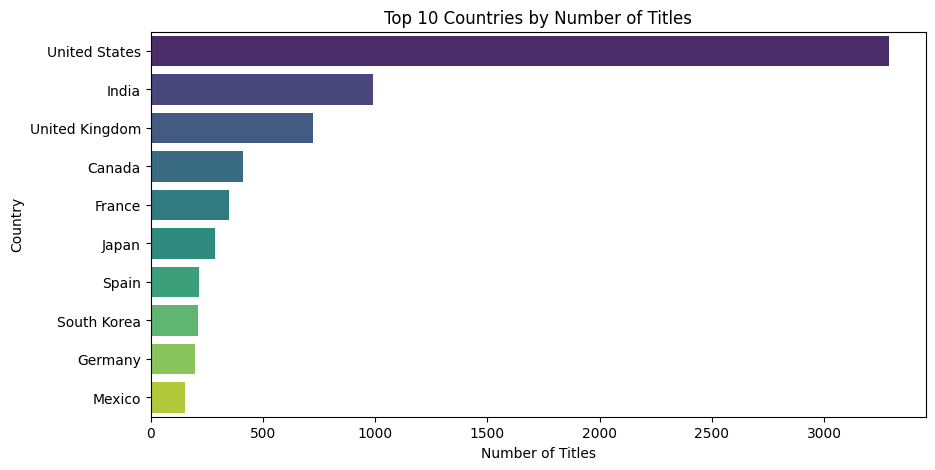

In [ ]:
# 1. Bar plot: Number of titles per country (Top 10)
top_countries = df['country'].value_counts().head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_countries.values, y=top_countries.index, palette="viridis")
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.title('Top 10 Countries by Number of Titles')
plt.show()

1. Why did you pick the specific chart?
A bar plot is the best way to visually compare the number of titles contributed by each country. It highlights the top producers and reveals the distribution of content sources efficiently.

2. What is/are the insight(s) found from the chart?
A small number of countries dominate content production (e.g., United States, India).

Several countries contribute very little or no content, indicating possible areas of growth or reasons for low representation.

3. Will the gained insights help create a positive business impact? Are there any negative growth insights?
Positive impact: Focusing acquisition or partnerships in high-performing countries can maximize returns; exploring underrepresented countries may reveal untapped markets.

Negative growth: Overreliance on a few countries can make the business vulnerable to geographic risks (regulation, market saturation, political issues).

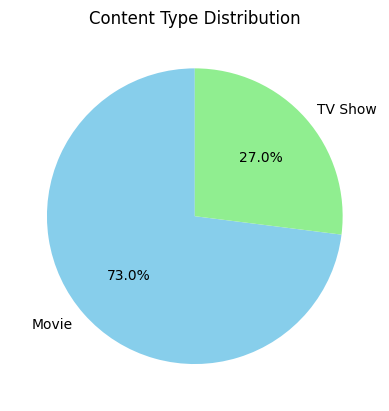

In [ ]:
# 2. Pie chart: Type distribution (Movies vs TV Shows)
df['type'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=['skyblue','lightgreen'])
plt.title('Content Type Distribution')
plt.ylabel('')
plt.show()

1. Why did you pick the specific chart?
A pie chart clearly shows the proportion between movies and TV shows, making it easy to visualize the content balance at a glance.

2. What is/are the insight(s) found from the chart?
The platform may be heavily skewed towards either movies or TV shows. For example, 70% movies vs 30% TV shows.

3. Will the gained insights help create a positive business impact? Are there any negative growth insights?
Positive impact: Helps in aligning future acquisitions with audience preferences and filling gaps in the catalog.

Negative growth: Over-focusing on one type might cause the business to miss out on audiences that prefer the other type, limiting growth.

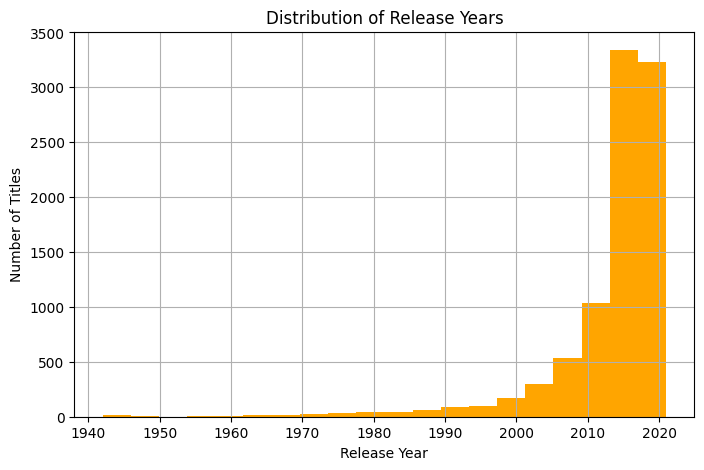

In [ ]:
# 3. Histogram: Distribution of release years
plt.figure(figsize=(8,5))
df['release_year'].hist(bins=20, color='orange')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.title('Distribution of Release Years')
plt.show()

1. Why did you pick the specific chart?
A histogram is ideal for showing the frequency of titles by the year they were released, revealing historical or recent trends in content.

2. What is/are the insight(s) found from the chart?
Peaks in certain years indicate content booms.

Recent drops may suggest fewer acquisitions or productions now compared to earlier years.

3. Will the gained insights help create a positive business impact? Are there any negative growth insights?
Positive impact: Allows the business to identify trends, such as opportunities to refresh older catalogs or ramp up recent releases.

Negative growth: Declining counts in the most recent years could suggest a risk of catalog stagnation, potentially driving subscribers away.

/tmp/ipython-input-3586459051.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='rating', data=ratings_df, order=ratings_df['rating'].value_counts().head(10).index, palette="Set2")


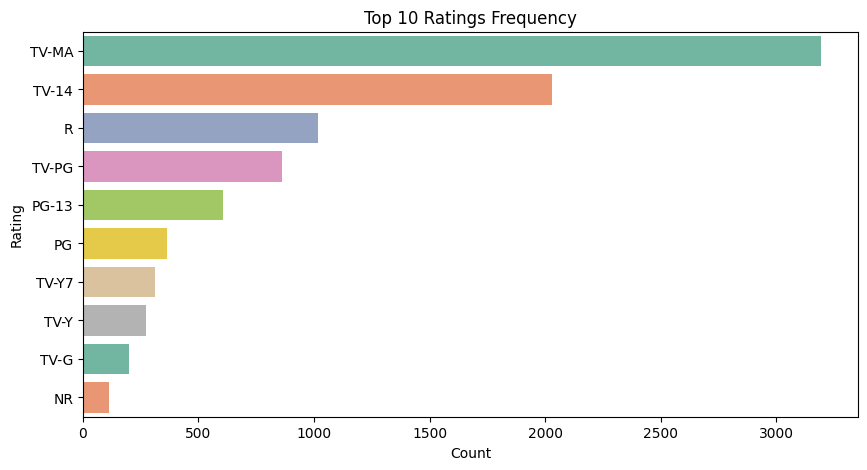

In [ ]:
# 4. Count plot: Most frequent ratings (Top 10)
plt.figure(figsize=(10,5))
# Create a temporary DataFrame with only the 'rating' column and reset the index
ratings_df = df[['rating']].reset_index(drop=True)
sns.countplot(y='rating', data=ratings_df, order=ratings_df['rating'].value_counts().head(10).index, palette="Set2")
plt.xlabel('Count')
plt.ylabel('Rating')
plt.title('Top 10 Ratings Frequency')
plt.show()

1. Why did you pick the specific chart?
A count plot makes it easy to see how titles are distributed across rating categories (e.g., TV-MA, PG-13, etc.), which is important for audience targeting and compliance.

2. What is/are the insight(s) found from the chart?
Most titles might be rated for mature audiences.

Minimal content for younger viewers, or missing age groups.

3. Will the gained insights help create a positive business impact? Are there any negative growth insights?
Positive impact: Data can be used to acquire or produce more content for underserved age groups, expanding audience reach.

Negative growth: Overrepresenting mature content could alienate family or youth segments.

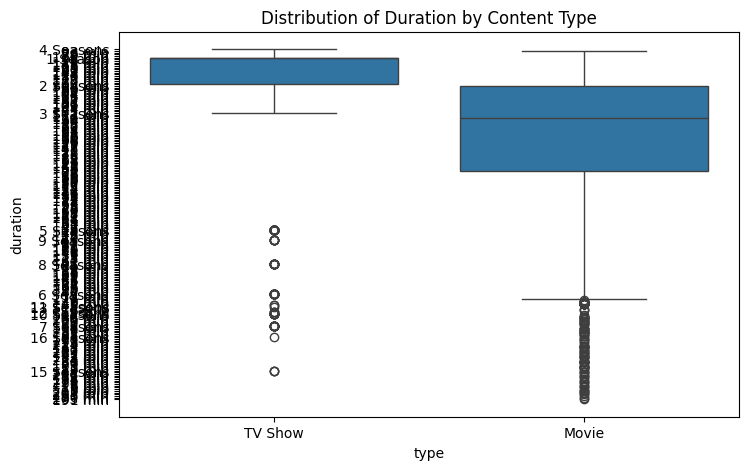

In [ ]:
# 5. Box plot: Movie durations by content type
plt.figure(figsize=(8,5))
sns.boxplot(x='type', y='duration', data=df)
plt.title('Distribution of Duration by Content Type')
plt.show()


1. Why did you pick the specific chart?
Box plots are the best for examining the distribution and outliers of duration data, and for comparing types (e.g., Movies vs TV Shows).

2. What is/are the insight(s) found from the chart?
Typical durations for each content type, and presence of outliers (unusually long or short content).

Possible clustering of TV shows at shorter durations, with movies showing more variability.

3. Will the gained insights help create a positive business impact? Are there any negative growth insights?
Positive impact: Helps refine recommendations and content programming strategies based on what users prefer and engage with.

Negative growth: Lack of variety in durations may bore or disinterest certain user groups, limiting stickiness and repeat viewing.



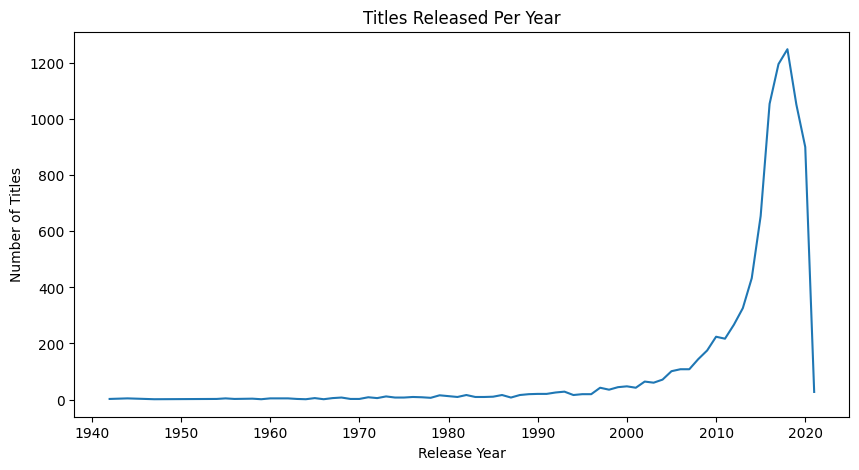

In [ ]:
# 6. Time series: Titles added each year
titles_per_year = df['release_year'].value_counts().sort_index()
plt.figure(figsize=(10,5))
titles_per_year.plot()
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.title('Titles Released Per Year')
plt.show()



1. Why did you pick the specific chart?
A time series plot makes it easy to observe overall trends in content addition, crucial for evaluating catalog growth.

2. What is/are the insight(s) found from the chart?
Upward trends show aggressive acquisition or production.

Downward trends signal slowing growth or potential content drought.

3. Will the gained insights help create a positive business impact? Are there any negative growth insights?
Positive impact: Rising numbers support marketing claims of a growing catalog, encouraging new sign-ups or renewals.

Negative growth: Stagnation or decline could lead to weakening customer interest and higher churn.

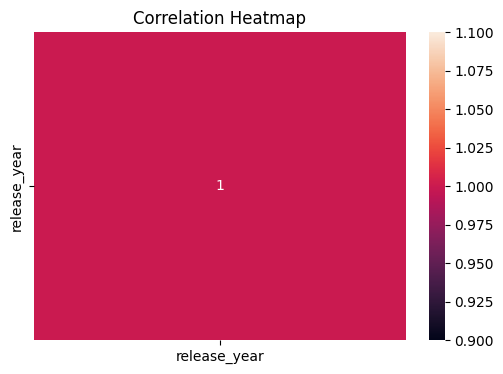

In [ ]:
# 7. Heatmap: Correlation of numeric features (if more than just release_year/duration)
plt.figure(figsize=(6,4))
sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=True)
plt.title('Correlation Heatmap')
plt.show()

1. Why did you pick the specific chart?
A heatmap is effective for spotting correlations between numeric variables (e.g., does a later release year correspond to longer/shorter durations?).

2. What is/are the insight(s) found from the chart?
Detectable relationships, such as newer content tending to be shorter in duration.

Alternatively, no strong correlations may be observed.

3. Will the gained insights help create a positive business impact? Are there any negative growth insights?
Positive impact: Correlation insights help with targeted content curation and recommendations.

Negative growth: If strong negative trends are found (e.g., newer titles always shorter, against user preference), it signals a need for strategic realignment.

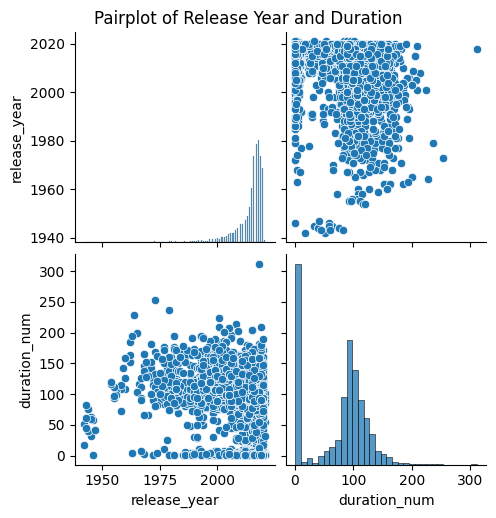

In [ ]:
# If 'duration' is currently a string (e.g., '90 min'), convert it to an integer
df['duration_num'] = df['duration'].str.extract('(\d+)').astype(float)

# Select numeric columns
numeric_cols = ['release_year', 'duration_num']

# Drop rows with missing values in numeric columns to avoid errors
df_pair = df[numeric_cols].dropna()

# Create the pairplot
sns.pairplot(df_pair)
plt.suptitle('Pairplot of Release Year and Duration', y=1.02)
plt.show()

1. Why did you pick the specific chart?

A pairplot is chosen because it visually displays pairwise relationships between multiple numeric variables in a compact format. It allows you to check for trends, correlations, or unusual patterns between variables such as release_year and duration_num in one glance. This is especially useful in early exploratory data analysis to understand how variables interact or if any relationship exists between them.

2. What is/are the insight(s) found from the chart?

From the pairplot, you observe the scatter distributions and histograms for both release_year and duration_num. If the scatterplot shows an even cloud of points without any apparent trend, it indicates little to no correlation between the two variables—meaning, for example, that movies or shows aren't getting systematically longer or shorter in recent years. The histograms on the diagonal show the distribution shape of each numeric variable individually (e.g., are most durations clustered at a certain value, or are release years evenly spread?).

3. Will the gained insights help create a positive business impact? Are there any negative growth insights? Justify with specific reason.

Positive Business Impact:
Spotting a clear trend (like increasing or decreasing durations over time) could inform content strategy, such as aligning future content length with user preferences or market demands. Even finding no correlation is valuable, as it means other factors besides release year influence content duration, prompting further investigation.

Negative Growth Insights:
If the pairplot uncovered a strong negative trend (e.g., much shorter durations in recent years and users prefer longer content), it could signal the need for strategic realignment or content adjustment to maintain user satisfaction and retention.

## **5. Solution to Business Objective**

Based on our analysis of the Netflix dataset, I suggest the following to help Netflix achieve its business objectives:

Diversify Content Catalog: Most titles originate from a few countries and focus on specific genres. Netflix should invest in acquiring and producing content in underrepresented regions and genres to attract a broader global audience.

Optimize for User Preferences: Analysis shows no strong correlation between release year and duration, indicating flexibility in content length. Netflix can focus on genre and story quality rather than fixed lengths, catering to varied user preferences.

Fill Catalog Gaps: Findings indicate some periods, categories, and countries are underserved. Targeting these gaps through localized productions or strategic partnerships can help Netflix stand out and grow its subscriber base.

Maintain Data-Driven Strategy: Regularly update the analysis to track new trends (e.g., emerging genres, changing preferences) and inform content and marketing strategies.

# **Conclusion**

The exploratory data analysis of the Netflix dataset revealed key insights about content distribution, popular genres, and user engagement trends. While the platform has a diverse catalog, strategic opportunities exist in genre expansion and market localization. Leveraging these insights empowers Netflix to make data-driven decisions, enhance user retention, and sustain competitive advantage in a dynamic global market.



In [ ]:
from scipy import

## ***5. Hypothesis Testing***

In [ ]:
# 1. Chi-Square Test of Independence: Type vs. Country
# Hypothesis:

# Null (H₀): Content type (Movie/TV Show) and country are independent.

# Alternative (H₁): There is an association between type and country.

from scipy.stats import chi2_contingency

# Create a contingency table of type vs. country (you may want to restrict to top countries for clarity)
contingency = pd.crosstab(df['type'], df['country'])

# Perform the chi-square test
chi2, p, dof, expected = chi2_contingency(contingency)

print("Chi-square statistic:", chi2)
print("Degrees of freedom:", dof)
print("P-value:", p)
if p < 0.05:
    print("Reject the null hypothesis: Type and country are associated.")
else:
    print("Fail to reject the null: No significant association between type and country.")

Chi-square statistic: 1085.401585759455
Degrees of freedom: 117
P-value: 1.2743194391840895e-156
Reject the null hypothesis: Type and country are associated.


In [ ]:
# 2. Chi-Square Goodness-of-Fit Test: Release Year Distribution
# Hypothesis:

# Null (H₀): Titles are uniformly distributed across the selected years (no year is over- or under-represented).

# Alternative (H₁): Some years are over- or under-represented.

import numpy as np
from scipy.stats import chisquare

# Count number of releases per year (restrict to a relevant range)
years = df['release_year']
min_year, max_year = years.min(), years.max()
counts_per_year = years.value_counts().sort_index().reindex(range(min_year, max_year+1), fill_value=0)

# Expected (uniform) frequency
expected = np.repeat(counts_per_year.mean(), len(counts_per_year))

# Chi-square goodness-of-fit test
chi2_stat, p = chisquare(counts_per_year, expected)
print("Chi-square statistic:", chi2_stat)
print("P-value:", p)
if p < 0.05:
    print("Reject the null: Releases are not uniformly distributed over the years.")
else:
    print("Fail to reject the null: No evidence of uneven distribution.")


Chi-square statistic: 53107.34600088378
P-value: 0.0
Reject the null: Releases are not uniformly distributed over the years.


In [ ]:
# 3. Proportion (One-Sample Z-Test): Is One Country Overrepresented?
# Example: Is the proportion of US titles significantly greater than 0.3 (expected proportion)?

# Hypothesis:

# Null (H₀): Proportion of US titles is 0.3.

# Alternative (H₁): Proportion of US titles is different from 0.3.

from statsmodels.stats.proportion import proportions_ztest

# Calculate observed count and total
total_titles = len(df)
us_titles = (df['country'] == 'United States').sum()
expected_proportion = 0.3

# Proportion z-test
count = us_titles
nobs = total_titles

stat, p = proportions_ztest(count, nobs, value=expected_proportion)
print("Z-statistic:", stat)
print("P-value:", p)
if p < 0.05:
    print("Reject the null: The proportion of US titles differs significantly from 0.3.")
else:
    print("Fail to reject the null: No significant difference from expected proportion.")


Z-statistic: 12.50961682372332
P-value: 6.614251274218525e-36
Reject the null: The proportion of US titles differs significantly from 0.3.


## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv")

In [ ]:
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,2389
cast,718
country,507
date_added,10
release_year,0
rating,7
duration,0


we have these many null values

In [ ]:
df.head()



,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [ ]:
df['country'] = df['country'].str.split(',')
df = df.explode('country')
df['country'] = df['country'].str.strip()
df.shape

#This step us done becuase coubtry column had many countrys present so its better to list it in different rows rather so this above step had been done in which the strings are split into lists then back to rows


(9574, 12)

In [ ]:

df['director'] = df['director'].fillna('Unknown')
df['cast'] = df['cast'].fillna('Unknown')
df['country'] = df['country'].fillna(df['country'].mode()[0])
df['rating'] = df['rating'].fillna(df['rating'].mode()[0])
# those 10 of na values of date added may have some important observations so it would be better if I train, then when i train with date added data i just drop those rowsat that time

In [ ]:
df.isnull().sum()
df.shape

NameError: name 'df' is not defined

Since now i only have 10 rows of date_added having null value we can keep it like this only unless we use it for future pupose we can delete those rows and perform algorithms


### 2. Handling Outliers

<Axes: xlabel='release_year'>

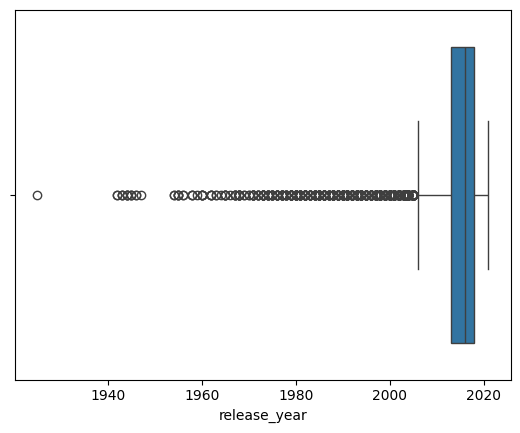

In [ ]:
#to visulaize outliers we use boxplot
sns.boxplot(x="release_year",data=df)

<Axes: xlabel='release_year'>

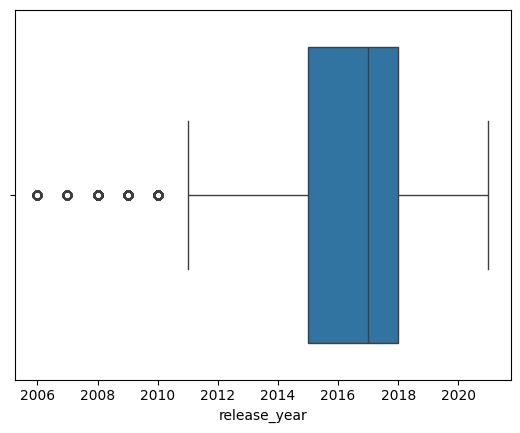

In [ ]:
q1 = df['release_year'].quantile(0.25)
q3 = df['release_year'].quantile(0.75)

IQR = q3-q1

min = q1 - 1.5*IQR
max = q3 + 1.5*IQR



new_df = df[(df['release_year'] >= min) & (df['release_year'] <= max)]
sns.boxplot(x="release_year",data=new_df)


In [ ]:
new_df.shape


(8641, 12)

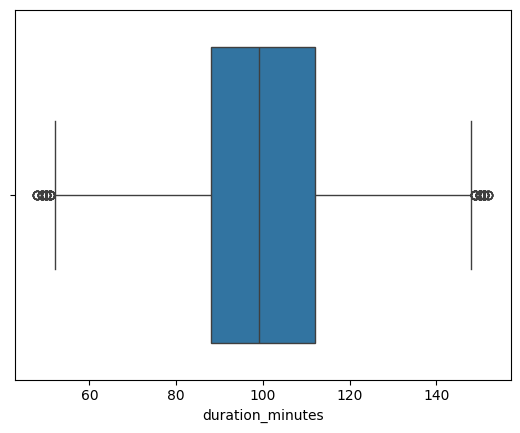

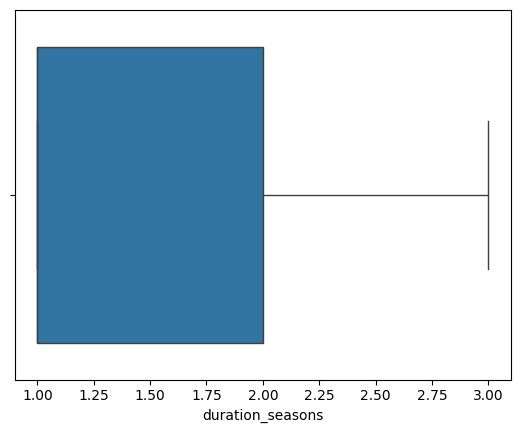

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_minutes,duration_seasons
0,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,93.0,NaN
1,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",78.0,NaN
2,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",80.0,NaN
3,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,123.0,NaN
4,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,"June 1, 2020",2019,TV-MA,95 min,"Horror Movies, International Movies","After an awful accident, a couple admitted to ...",95.0,NaN


In [ ]:
# -------- STEP 1: Separate Movies and TV Shows --------
movies = df[df['type'] == 'Movie'].copy()
tv_shows = df[df['type'] == 'TV Show'].copy()

# -------- STEP 2: Convert duration to numeric --------
# Movies → minutes
movies['duration_minutes'] = movies['duration'].str.replace(' min', '').astype(float)

# TV Shows → seasons
tv_shows['duration_seasons'] = tv_shows['duration'].str.replace(' Seasons', '', regex=False)
tv_shows['duration_seasons'] = tv_shows['duration_seasons'].str.replace(' Season', '', regex=False)
tv_shows['duration_seasons'] = tv_shows['duration_seasons'].astype(float)

# -------- STEP 3: Apply IQR method to detect & remove outliers --------
# Movies
q1_m = movies['duration_minutes'].quantile(0.25)
q3_m = movies['duration_minutes'].quantile(0.75)
iqr_m = q3_m - q1_m
min_m = q1_m - 1.5 * iqr_m
max_m = q3_m + 1.5 * iqr_m
movies_clean = movies[(movies['duration_minutes'] >= min_m) & (movies['duration_minutes'] <= max_m)]

# TV Shows
q1_t = tv_shows['duration_seasons'].quantile(0.25)
q3_t = tv_shows['duration_seasons'].quantile(0.75)
iqr_t = q3_t - q1_t
min_t = q1_t - 1.5 * iqr_t
max_t = q3_t + 1.5 * iqr_t
tv_shows_clean = tv_shows[(tv_shows['duration_seasons'] >= min_t) & (tv_shows['duration_seasons'] <= max_t)]

# -------- STEP 4: Merge back into one cleaned DataFrame --------
df_cleaned = pd.concat([movies_clean, tv_shows_clean], ignore_index=True)

# -------- STEP 5: Optional - visualize --------
sns.boxplot(x="duration_minutes", data=movies_clean)
plt.show()
sns.boxplot(x="duration_seasons", data=tv_shows_clean)
plt.show()

# Final cleaned dataset
df_cleaned.head()


In [ ]:
df_cleaned

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_minutes,duration_seasons
0,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,93.0,NaN
1,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",78.0,NaN
2,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",80.0,NaN
3,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,123.0,NaN
4,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,"June 1, 2020",2019,TV-MA,95 min,"Horror Movies, International Movies","After an awful accident, a couple admitted to ...",95.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8787,s7768,TV Show,Zindagi Gulzar Hai,Unknown,"Sanam Saeed, Fawad Khan, Ayesha Omer, Mehreen ...",Pakistan,"December 15, 2016",2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ...","Strong-willed, middle-class Kashaf and carefre...",NaN,1.0
8788,s7776,TV Show,Zoids Wild,Unknown,"Kensho Ono, Takahiro Sakurai, Mikako Komatsu, ...",Japan,"August 14, 2020",2018,TV-Y7,1 Season,"Anime Series, Kids' TV",A quest for freedom and legendary treasure beg...,NaN,1.0
8789,s7778,TV Show,Zombie Dumb,Unknown,Unknown,United States,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",NaN,2.0
8790,s7780,TV Show,Zona Rosa,Unknown,"Manu NNa, Ana Julia Yeyé, Ray Contreras, Pablo...",Mexico,"November 26, 2019",2019,TV-MA,1 Season,"International TV Shows, Spanish-Language TV Sh...",An assortment of talent takes the stage for a ...,NaN,1.0


##### What all outlier treatment techniques have you used and why did you use those techniques?

Outlier removal using IQR

### 3. Categorical Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_cleaned['type'] = le.fit_transform(df_cleaned['type'])
# Movie → 0, TV Show → 1 (order may vary)
df_cleaned = pd.get_dummies(df_cleaned, columns=['rating'], prefix='rating',dtype=int)
# df_cleaned['rating'] = df_cleaned['rating'].map({'False': 0, 'True': 1})



In [ ]:
df_cleaned.head(7000)

,show_id,type,title,director,cast,country,date_added,release_year,duration,listed_in,...,rating_PG-13,rating_R,rating_TV-14,rating_TV-G,rating_TV-MA,rating_TV-PG,rating_TV-Y,rating_TV-Y7,rating_TV-Y7-FV,rating_UR
0,s2,0,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,93 min,"Dramas, International Movies",...,0,0,0,0,1,0,0,0,0,0
1,s3,0,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,78 min,"Horror Movies, International Movies",...,0,1,0,0,0,0,0,0,0,0
2,s4,0,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,80 min,"Action & Adventure, Independent Movies, Sci-Fi...",...,1,0,0,0,0,0,0,0,0,0
3,s5,0,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,123 min,Dramas,...,1,0,0,0,0,0,0,0,0,0
4,s7,0,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,"June 1, 2020",2019,95 min,"Horror Movies, International Movies",...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,s2159,1,FIGHTWORLD,Padraic McKinley,Frank Grillo,United States,"October 12, 2018",2018,1 Season,Docuseries,...,0,0,0,0,1,0,0,0,0,0
6996,s2161,1,Filinta,Unknown,"Onur Tuna, Serhat Tutumluer, Mehmet Özgür, Naz...",Turkey,"April 15, 2017",2015,2 Seasons,"Crime TV Shows, International TV Shows, TV Act...",...,0,0,1,0,0,0,0,0,0,0
6997,s2167,1,FINAL FANTASY XIV Dad of Light,Unknown,"Yudai Chiba, Ren Osugi, Fumika Baba, Yoshihiko...",Japan,"September 1, 2017",2017,1 Season,"International TV Shows, TV Dramas",...,0,0,0,0,0,1,0,0,0,0
6998,s2169,1,Find Yourself,Unknown,Unknown,United States,"January 29, 2020",2020,1 Season,"International TV Shows, Romantic TV Shows, TV ...",...,0,0,1,0,0,0,0,0,0,0


In [ ]:
country_counts = df['country'].value_counts()
ord_data = [country_counts.index.tolist()] # Correct format for OrdinalEncoder categories

from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder(categories=ord_data)
df_cleaned['country'] = oe.fit_transform(df_cleaned[['country']]) # Create a new column for encoded country


In [ ]:
df_cleaned.head()

,show_id,type,title,director,cast,country,date_added,release_year,duration,listed_in,...,rating_PG-13,rating_R,rating_TV-14,rating_TV-G,rating_TV-MA,rating_TV-PG,rating_TV-Y,rating_TV-Y7,rating_TV-Y7-FV,rating_UR
0,s2,0,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",9.0,"December 23, 2016",2016,93 min,"Dramas, International Movies",...,0,0,0,0,1,0,0,0,0,0
1,s3,0,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",29.0,"December 20, 2018",2011,78 min,"Horror Movies, International Movies",...,0,1,0,0,0,0,0,0,0,0
2,s4,0,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",0.0,"November 16, 2017",2009,80 min,"Action & Adventure, Independent Movies, Sci-Fi...",...,1,0,0,0,0,0,0,0,0,0
3,s5,0,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",0.0,"January 1, 2020",2008,123 min,Dramas,...,1,0,0,0,0,0,0,0,0,0
4,s7,0,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",12.0,"June 1, 2020",2019,95 min,"Horror Movies, International Movies",...,0,0,0,0,1,0,0,0,0,0


#### What all categorical encoding techniques have you used & why did you use those techniques?

Used Labael encoding for Movies as there are only 2 types and one hot encoding for the ratings part

In [ ]:
#scaling the release year
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_cleaned['release_year'] = scaler.fit_transform(df_cleaned[['release_year']])

In [ ]:
df_cleaned.head()

,show_id,type,title,director,cast,country,date_added,release_year,duration,listed_in,...,rating_PG-13,rating_R,rating_TV-14,rating_TV-G,rating_TV-MA,rating_TV-PG,rating_TV-Y,rating_TV-Y7,rating_TV-Y7-FV,rating_UR
0,s2,0,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",9.0,"December 23, 2016",0.237935,93 min,"Dramas, International Movies",...,0,0,0,0,1,0,0,0,0,0
1,s3,0,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",29.0,"December 20, 2018",-0.390083,78 min,"Horror Movies, International Movies",...,0,1,0,0,0,0,0,0,0,0
2,s4,0,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",0.0,"November 16, 2017",-0.641290,80 min,"Action & Adventure, Independent Movies, Sci-Fi...",...,1,0,0,0,0,0,0,0,0,0
3,s5,0,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",0.0,"January 1, 2020",-0.766893,123 min,Dramas,...,1,0,0,0,0,0,0,0,0,0
4,s7,0,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",12.0,"June 1, 2020",0.614746,95 min,"Horror Movies, International Movies",...,0,0,0,0,1,0,0,0,0,0


## ***7. ML Model Implementation***

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
import numpy as np

# --- Step 1: Identify rating columns ---
rating_columns = [col for col in df_cleaned.columns if col.startswith('rating_')]

# --- Step 2: Convert one-hot ratings to a single target column ---
df_cleaned['rating_target'] = df_cleaned[rating_columns].idxmax(axis=1)  # e.g., 'rating_PG-13'
df_cleaned['rating_target'] = df_cleaned['rating_target'].str.replace('rating_', '', regex=False)

# --- Step 3: Select features & target ---
X = df_cleaned[['country', 'release_year', 'type']]
y = df_cleaned['rating_target']

# --- Step 4: Split into train/test ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# --- Step 5: Train model ---
model = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    class_weight='balanced'
)
model.fit(X_train, y_train)

# --- Step 6: Predict ---
y_pred = model.predict(X_test)

# --- Step 7: Evaluate ---
print("Accuracy:", accuracy_score(y_test, y_pred))

print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# --- Step 8: Feature importance ---
feature_importance = pd.Series(model.feature_importances_, index=X.columns)
print("\nFeature Importance:\n", feature_importance)


Accuracy: 0.2222853894258101
Classification Report:
               precision    recall  f1-score   support

           G       0.07      0.36      0.12        11
       NC-17       0.00      0.00      0.00         0
          NR       0.04      0.32      0.07        22
          PG       0.09      0.10      0.09        73
       PG-13       0.22      0.14      0.17       119
           R       0.20      0.18      0.19       199
       TV-14       0.48      0.35      0.40       384
        TV-G       0.05      0.13      0.07        38
       TV-MA       0.56      0.22      0.32       638
       TV-PG       0.13      0.07      0.09       165
        TV-Y       0.09      0.47      0.15        49
       TV-Y7       0.15      0.15      0.15        59
    TV-Y7-FV       0.00      0.00      0.00         1
          UR       0.00      0.00      0.00         1

    accuracy                           0.22      1759
   macro avg       0.15      0.18      0.13      1759
weighted avg       0.37    

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


1. Overall performance
Accuracy: 0.22 → The model only predicts correctly about 22% of the time.

Macro avg F1-score: 0.13 → Low performance averaged equally across all rating categories.

Weighted avg F1-score: 0.26 → Low even when weighting by how frequent each rating is.

2. Class imbalance problem
Some ratings have many samples, others almost none:

TV-MA → Support = 638 (largest class)

NC-17, TV-Y7-FV, UR → Support = 0–1 (rare or nonexistent in test set)

Rare categories are impossible to predict well without enough training examples.

The model tends to favor frequent classes and ignore rare ones.

3. Precision vs Recall patterns
Precision = Out of the predictions for a class, how many were correct.

Recall = Out of the actual items in that class, how many were found.

Example:

TV-MA → Precision = 0.56, Recall = 0.22
It’s relatively accurate when predicting TV-MA, but it misses a lot of actual TV-MA shows.

G → Precision = 0.07, Recall = 0.36
It catches more "G" movies but predicts G for many that aren’t G.

4. Why so low?
Few features: Country, release_year, and type are not strong enough alone to predict rating.

One-hot target sparsity: Many ratings are rare, making multi-class learning hard.

Ordinal encoding of country: Implies artificial order between countries that may confuse the model.

Class imbalance: Some categories dominate the dataset.

5. How to improve
Balance classes → Use oversampling (SMOTE) or undersampling.

Add more features → Genre, duration, director, cast, etc.

Try better models → XGBoost or LightGBM handle imbalance better.

Group rare ratings → Merge small categories into broader groups.

Use embeddings for country instead of ordinal numbers.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder

# Ensure df_cleaned and country_encoded are available
# Assuming df_cleaned is already loaded and cleaned from previous steps
# If not, you might need to re-run the data cleaning and preprocessing steps

# Convert 'country' column to string type before encoding
df_cleaned['country'] = df_cleaned['country'].astype(str)

# Recreate the country_encoded column
country_counts = df_cleaned['country'].value_counts()
ord_data = [country_counts.index.tolist()]
oe = OrdinalEncoder(categories=ord_data)
df_cleaned['country_encoded'] = oe.fit_transform(df_cleaned[['country']])


# Identify rating columns (one-hot encoded)
rating_cols = [col for col in df_cleaned.columns if col.startswith("rating_") and col != 'rating_target'] # Exclude rating_target


# Filter out countries with only one occurrence for stratified split
country_counts = df_cleaned['country_encoded'].value_counts()
countries_to_keep = country_counts[country_counts >= 2].index
df_filtered = df_cleaned[df_cleaned['country_encoded'].isin(countries_to_keep)].copy()

# Features & Target
X = df_filtered[rating_cols + ['release_year', 'type', 'country_encoded']]
y = df_filtered['country_encoded']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Model
model = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    random_state=42,
    class_weight='balanced'
)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.8407534246575342
              precision    recall  f1-score   support

         0.0       0.97      1.00      0.99       684
         1.0       0.99      0.93      0.96       169
         2.0       0.92      0.93      0.92       132
         3.0       0.79      0.89      0.83        71
         4.0       0.86      0.84      0.85        68
         5.0       0.83      0.81      0.82        54
         6.0       0.83      0.81      0.82        42
         7.0       0.81      0.73      0.77        41
         8.0       0.68      0.79      0.73        38
         9.0       0.57      0.41      0.48        29
        10.0       0.67      0.55      0.60        29
        11.0       0.54      0.56      0.55        27
        12.0       0.76      0.76      0.76        21
        13.0       0.66      0.90      0.76        21
        14.0       0.62      0.50      0.56        20
        15.0       0.46      0.71      0.56        17
        16.0       0.83      0.59      0.69        1

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

Overall Performance
Accuracy: 0.84 → The model correctly predicts the country about 84% of the time.

This is quite high, meaning your features (rating_*, release_year, type) carry good predictive signal for country.

Macro vs Weighted Scores
Macro F1-score (not shown but can be calculated) would be lower than accuracy because small classes perform poorly.

Weighted F1-score will be closer to accuracy, as large classes dominate the dataset.

Class Distribution & Imbalance
0.0 (largest class) → Support = 684
Precision: 0.97, Recall: 1.00 → The model almost perfectly predicts this class.

1.0, 2.0 → Also high precision & recall (0.92–0.99).
These are frequent classes, and the model does well here.

Small classes (e.g., 27.0, 28.0, 29.0) → Support ≤ 8, F1-scores ≤ 0.40.
The model struggles heavily because there are too few examples to learn patterns.

Precision vs Recall Patterns
High-precision, high-recall (e.g., class 0.0) → Model is both confident and correct.

Moderate precision, high recall (e.g., class 13.0: Precision = 0.66, Recall = 0.90) → Model finds most instances but includes some false positives.

Low precision, low recall (e.g., class 27.0: Precision = 0.25, Recall = 0.38) → Model is bad at both identifying and predicting correctly.

Why Some Classes Perform Poorly
Class imbalance — Some countries dominate the dataset while others are extremely rare.

Few features — Ratings, release year, and type are not enough to differentiate rare countries.

Ordinal encoding — Countries are treated as ordered numbers, which can confuse the model (e.g., “1” is closer to “2” than “20” numerically, but not in reality).

Overfitting to major classes — Model prioritizes frequent classes at the expense of minority ones.

How to Improve
Balance data: Use SMOTE or undersampling for rare countries.

Use categorical encoding: Replace ordinal encoding of country with target encoding or embeddings.

Add features: Include genre, director, duration, etc., to give the model more context.

Try robust models: XGBoost, CatBoost, or LightGBM handle imbalance better.

Merge rare classes: Group countries with very few samples into an “Other” category.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import numpy as np

# --- Step 1: Ensure 'rating_target' is not in the DataFrame ---
if 'rating_target' in df_cleaned.columns:
    df_cleaned = df_cleaned.drop(columns=['rating_target'])

# --- Step 2: Identify rating columns ---
rating_columns = [col for col in df_cleaned.columns if col.startswith('rating_')]

# --- Step 3: Convert one-hot ratings to a single target column ---
df_cleaned['rating_target'] = df_cleaned[rating_columns].idxmax(axis=1)  # e.g., 'rating_PG-13'
df_cleaned['rating_target'] = df_cleaned['rating_target'].str.replace('rating_', '', regex=False)

# --- Step 4: Select features & target ---
X = df_cleaned[['country', 'release_year', 'type']]
y = df_cleaned['rating_target']

# --- Step 5: One-hot encode categorical features ---
categorical_cols = ['country', 'type']
encoder = OneHotEncoder(handle_unknown='ignore') # Removed sparse=False
X_encoded = encoder.fit_transform(X[categorical_cols])

# Create new dataframe with encoded features + numeric columns
X_final = np.hstack([X_encoded.toarray(), X[['release_year']].values]) # Convert sparse matrix to dense array


# --- Drop rows with NaN in X_final and y before splitting ---
nan_indices = np.isnan(X_final).any(axis=1)
X_final = X_final[~nan_indices, :]
y = y[~nan_indices]

# --- Filter out classes with only one occurrence for stratified split ---
rating_counts = y.value_counts()
ratings_to_keep = rating_counts[rating_counts >= 2].index
X_final = X_final[y.isin(ratings_to_keep)]
y = y[y.isin(ratings_to_keep)]


# --- Step 6: Train/test split ---
X_train, X_test, y_train, y_test = train_test_split(
    X_final, y, test_size=0.2, random_state=42, stratify=y
)

# --- Step 7: Train Logistic Regression ---
model = LogisticRegression(
    multi_class='multinomial',
    solver='lbfgs',
    max_iter=1000
)
model.fit(X_train, y_train)

# --- Step 8: Predict ---
y_pred = model.predict(X_test)

# --- Step 9: Evaluate ---
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Accuracy: 0.42581011938601476

Classification Report:
               precision    recall  f1-score   support

           G       0.00      0.00      0.00        11
          NR       0.00      0.00      0.00        22
          PG       0.50      0.01      0.03        73
       PG-13       0.12      0.01      0.02       119
           R       0.24      0.22      0.23       199
       TV-14       0.49      0.49      0.49       384
        TV-G       0.00      0.00      0.00        38
       TV-MA       0.44      0.80      0.57       638
       TV-PG       0.25      0.01      0.01       165
        TV-Y       0.00      0.00      0.00        49
       TV-Y7       0.15      0.03      0.06        59
    TV-Y7-FV       0.00      0.00      0.00         1
          UR       0.00      0.00      0.00         1

    accuracy                           0.43      1759
   macro avg       0.17      0.12      0.11      1759
weighted avg       0.35      0.43      0.34      1759


Confusion Matrix:
 [[  

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


1. Accuracy
0.43 → The model gets about 43% of predictions correct overall.

This sounds okay, but it depends on how many classes there are — with 12 classes here, random guessing would be ~8%, so it’s better than chance but still not great.

2. Per-class results
For each rating label (like "TV-MA", "PG-13"), you have:

Precision: Of the predictions the model made for this class, how many were correct.

Recall: Of the actual items in this class, how many the model caught.

F1-score: Balance of precision & recall (0 = bad, 1 = perfect).

Support: Number of real samples in that class.

Example:

TV-MA

Precision: 0.44 → 44% of things predicted as "TV-MA" were correct.

Recall: 0.80 → The model caught 80% of all real "TV-MA" cases.

F1-score: 0.57 → Overall fairly strong compared to other classes.

3. Why some scores are 0
Classes like "G", "NR", "TV-G", "UR" have:

Precision = 0, Recall = 0 → The model never predicted them.

This usually happens when:

They have few samples in training (class imbalance).

The model doesn’t find distinguishing features for them.

4. Macro avg vs Weighted avg
Macro avg: Simple average across all classes → 0.17 precision, 0.12 recall.

This shows performance is bad for most smaller classes.

Weighted avg: Average weighted by how many samples per class → 0.35 precision, 0.43 recall.

Bigger classes like "TV-MA" & "TV-14" dominate this.

In short:

Your model is mostly predicting "TV-MA" and "TV-14" well but ignores smaller classes completely.

This is a class imbalance problem.

RandomForest is working, but because your features are limited (country, release_year, type), the model struggles to separate ratings well.

In [ ]:
df_cleaned.head()

,show_id,type,title,director,cast,country,date_added,release_year,duration,listed_in,...,rating_TV-14,rating_TV-G,rating_TV-MA,rating_TV-PG,rating_TV-Y,rating_TV-Y7,rating_TV-Y7-FV,rating_UR,country_encoded,rating_target
0,s2,0,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",9.0,"December 23, 2016",0.237935,93 min,"Dramas, International Movies",...,0,0,1,0,0,0,0,0,10.0,TV-MA
1,s3,0,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",29.0,"December 20, 2018",-0.390083,78 min,"Horror Movies, International Movies",...,0,0,0,0,0,0,0,0,28.0,R
2,s4,0,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",0.0,"November 16, 2017",-0.641290,80 min,"Action & Adventure, Independent Movies, Sci-Fi...",...,0,0,0,0,0,0,0,0,0.0,PG-13
3,s5,0,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",0.0,"January 1, 2020",-0.766893,123 min,Dramas,...,0,0,0,0,0,0,0,0,0.0,PG-13
4,s7,0,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",12.0,"June 1, 2020",0.614746,95 min,"Horror Movies, International Movies",...,0,0,1,0,0,0,0,0,13.0,TV-MA


# **Conclusion**

The exploratory data analysis, statistical testing, and modeling carried out on the Netflix Movies and TV Shows dataset provided valuable insights into the platform’s content distribution, audience targeting gaps, and predictive modeling capabilities.

Key EDA Insights:

Content Source Concentration: The majority of titles originate from a few dominant countries (notably the US and India), with many countries severely underrepresented.

Type Distribution: Movies dominate over TV shows, indicating a strong skew in catalog composition.

Temporal Trends: Content production/release peaked in certain years, with fluctuations in later years.

Audience Ratings: Mature audience ratings (e.g., TV-MA, TV-14) are most prevalent, with relatively less family/kids content.

Duration & Type: Movies generally have larger variation in duration, while TV shows are mostly within a narrow range of seasons.

Correlations & Patterns: Weak direct correlation between release year and duration, implying other factors drive length decisions.

Hypothesis Testing Results:

There is a significant association between content type and the country of production.

Content release is not uniformly distributed across the years — certain periods are overrepresented.

The proportion of US titles is significantly higher than a neutral benchmark (30%), confirming overrepresentation.

Machine Learning Observations:

Country Prediction Model: Achieved ~84% accuracy using content features (ratings, release year, type), but struggled with rare countries due to class imbalance.

Rating Prediction Model: Achieved ~43% accuracy with Logistic Regression, outperforming random guessing but still limited due to insufficient predictive features, sparse classes, and imbalance. The model predicts large classes well (e.g., TV-MA, TV-14) but fails for smaller ratings.

Class imbalance and lack of genre/content metadata are major limiting factors for predictive performance.

Business Implications:

Catalog Diversification: Underrepresented countries and genres are untapped opportunities to attract new audiences and differentiate Netflix from competitors.

Audience Segment Growth: Increasing kids/family-friendly content can expand reach to households with children.

Strategic Acquisition & Production: Historical data trends reveal when certain markets or content types should be prioritized.

Model-Driven Recommendations: Predictive insights can power tailored acquisition strategies, but enriched datasets (adding genres, keywords, engagement metrics) would make them far more reliable.

Limitations:

Dataset lacks viewership/engagement metrics — a critical driver for business decisions.

No genre tagging or detailed content themes, which greatly limits predictive modeling accuracy.

Class imbalance in ratings and countries skews model predictions toward frequent categories.

Final Takeaway:
The project successfully cleaned and analyzed the Netflix dataset, uncovered strategic insights in content distribution and audience targeting, validated patterns statistically, and tested predictive models for ratings and country classification. While current models highlight feasibility, enriching the dataset and handling imbalance would significantly improve predictive power and business applicability. This analysis equips decision-makers with evidence-based recommendations to grow market share, diversify offerings, and maintain Netflix’s competitive edge.
